<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml03_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   훈련 셋과 테스트 셋을 나누는 방법
    *   순차 추출(sequential sampling)
    *   임의 추출(random sampling)
    *   층화 추출(stratified sampling)
*   분류 모델의 평가 지표(metrics)
    *   정확도(accuracy)
    *   정밀도(precision)
    *   재현율(recall)
    *   F1 score
*   특성 스케일링(feature scaling)
    *   표준화(standardization)
    *   정규화(normalization)

# 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  # 머신러닝 모델
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # 평가 지표 계산 함수
from sklearn.metrics import classification_report, confusion_matrix  # 평가 지표 내용 출력
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 특성 스케일링 변환기

# 데이터 준비

In [2]:
file_path = 'https://bit.ly/fish_csv_data'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [6]:
pd.set_option('display.max_rows', 10)

In [7]:
df = fish[fish.Species.isin(['Bream', 'Smelt'])]  # Bream(도미)와 Smelt(빙어) 선택

In [8]:
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [9]:
x = df[['Weight', 'Length']].values  # 특성 배열(features)

In [10]:
x[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [11]:
x[-5:]

array([[12.2, 12.2],
       [13.4, 12.4],
       [12.2, 13. ],
       [19.7, 14.3],
       [19.9, 15. ]])

In [12]:
y = df.Species.values  # 타겟 배열(target)

In [13]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# 훈련 셋/테스트 셋 분리

*   머신 러닝(Machine Learning): 컴퓨터가 데이터를 스스로 학습해서 예측.
*   훈련(train)/학습(learning): 머신 러닝 알고리즘(모델)에게 특성 데이터(와 레이블)을 제공.
*   평가: 학습된 데이터와 학습되지 않은 데이터를 얼마나 잘 예측하는 지 점수화.
*   훈련 셋: 머신 러닝 모델에게 제공하는 특성 데이터(와 레이블)
*   테스트 셋: 학습되지 않은 데이터를 얼마나 잘 예측하는 지 평가하기 위해서 남겨두는 데이터(와 레이블)

## 순차 추출(sequential sampling)

In [16]:
num_trains = 35  # 훈련 셋 샘플 개수(전체 샘플의 약 70%)

In [17]:
x_train = x[:num_trains]  # 훈련 셋
x_test = x[num_trains:]  # 테스트 셋

In [20]:
y_train = y[:num_trains]  # 훈련 레이블
y_test = y[num_trains:]  # 테스트 레이블

In [23]:
x_train.shape

(35, 2)

In [24]:
x_test.shape

(14, 2)

In [25]:
y_train.shape

(35,)

In [26]:
y_test.shape

(14,)

In [27]:
# KNN 모델 생성
knn = KNeighborsClassifier()

In [28]:
# KNN 모델 훈련
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

In [29]:
# 훈련된 KNN 모델을 훈련 셋으로 평가 - 훈련 셋에서의 정확도
knn.score(X=x_train, y=y_train)

1.0

In [30]:
# KNN 모델을 훈련할 때 사용하지 않았던 테스트 셋으로 평가 - 테스트 셋에서의 정확도
knn.score(X=x_test, y=y_test)

0.0

In [31]:
knn.predict(X=x_test)  # 테스트 셋에서의 예측값들

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [32]:
y_test  # 테스트 셋의 실젯값들

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

샘플들이 어떤 기준으로 정렬되어 있는 경우에는 순차 추출을 하게 되면 한번도 훈련되지 않는 레이블들이 있을 수 있기 때문에, 순차 추출을 사용하면 안됨.

## 임의 추출(random sampling)

In [35]:
indices = np.arange(49)
print(indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [36]:
np.random.seed(42)
np.random.shuffle(indices)  # 배열의 원소들을 무작위로 섞어줌.
print(indices)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [37]:
train_indices = indices[:num_trains]  # 훈련 셋을 샘플링하기 위한 인덱스들
test_indices = indices[num_trains:]  # 테스트 셋을 샘플링하기 위한 인덱스들

In [38]:
print(train_indices)
print(test_indices)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2]
[37 35 23 39 10 22 18 48 20  7 42 14 28 38]


In [39]:
x_train = x[train_indices]  # 훈련 셋
x_test = x[test_indices]  # 테스트 셋

In [40]:
x_train.shape

(35, 2)

In [41]:
x_train[:6]

array([[340. ,  32. ],
       [ 13.4,  12.4],
       [ 19.7,  14.3],
       [ 12.2,  12.2],
       [700. ,  33. ],
       [714. ,  36. ]])

In [42]:
y_train = y[train_indices]  # 훈련 레이블
y_test = y[test_indices]  # 테스트 레이블

In [43]:
y_train[:6]

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [44]:
# KNN 모델 생성
knn = KNeighborsClassifier()

In [45]:
# 모델 훈련
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

In [46]:
# 훈련 셋 평가 - 정확도
knn.score(X=x_train, y=y_train)

1.0

In [47]:
# 테스트 셋 평가
knn.score(X=x_test, y=y_test)

1.0

In [50]:
# 훈련 레이블에서 도미/빙어 빈도수 비율
pd.Series(y_train).value_counts(normalize=True)

,proportion
Bream,0.771429
Smelt,0.228571


In [53]:
# 테스트 레이블에서 도미/빙어 비율
pd.Series(y_test).value_counts(normalize=True)

,proportion
Bream,0.571429
Smelt,0.428571


임의 추출(random sampling)의 단점은 훈련 셋과 테스트 셋에서 각 클래스(도미/빙어)들의 비율이 비슷하지 않을 수도 있음. 머신 러닝 모델의 성능이 안 좋아질 수 있음. 이런 단점을 보완하는 추출 방식이 층화 추출.

## 층화 추출(stratified sampling)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=35,
                                                    random_state=42,
                                                    stratify=y)

`train_test_split()` 함수 파라미터:
*   가변길이 인수(`*arrays`): 훈련 셋과 테스트 셋으로 나눌 배열(들).
*   `test_size`: 테스트 셋의 샘플 개수(0 이상의 정수) 또는 비율(0.0 ~ 1.0).
    *   test_size를 설정하면 train_size는 자동으로 결정.
*   `train_size`: 훈련 셋의 샘플 개수 또는 비율.
    *   train_size를 설정하면 test_size는 자동으로 결정.
*   `random_state`: 난수를 생성할 때 사용할 seed 값.
*   `shuffle`: 샘플들을 무작위로 섞을 지 여부를 설정. 기본값은 True. random sampling이 기본 동작.
*   `stratify`: 층화 추출(stratified sampling)을 하기 위해서 각 클래스들의 비율을 알 수 있는 1차원 배열. 기본값은 None.

In [59]:
# 훈련 레이블에서의 각 클래스 비율
pd.Series(y_train).value_counts(normalize=True)

,proportion
Bream,0.714286
Smelt,0.285714


In [60]:
# 테스트 레이블에서의 각 클래스 비율
pd.Series(y_test).value_counts(normalize=True)

,proportion
Bream,0.714286
Smelt,0.285714


층화 추출된 훈련 셋과 테스트 셋 시각화

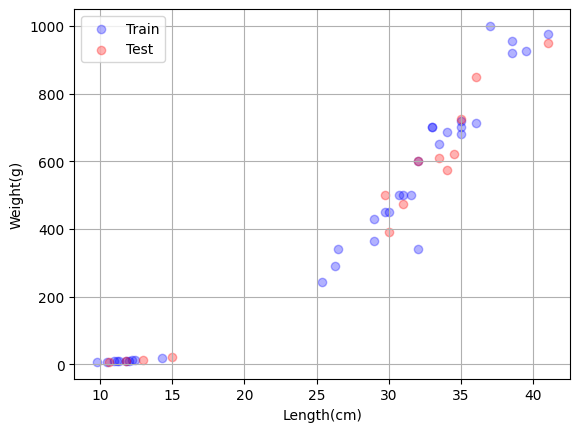

In [69]:
# 훈련 셋(x_train) 산점도
plt.scatter(x_train[:, 1], x_train[:, 0], alpha=0.3, label='Train', color='blue')

# 테스트 셋(x_test) 산점도
plt.scatter(x_test[:, 1], x_test[:, 0], alpha=0.3, label='Test', color='red')

plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

In [70]:
# KNN 모델 생성
knn = KNeighborsClassifier()

In [71]:
# KNN 모델 훈련
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

In [72]:
# 훈련 셋 평가
knn.score(X=x_train, y=y_train)

1.0

In [73]:
# 테스트 셋 평가
knn.score(X=x_test, y=y_test)

1.0

# 분류 평가 지표

| 구분 | 예측 양성(Predicted Positive) | 예측 음성(Predicted Negative) |
| :--- | :--- | :--- |
| **실제 양성(Actual Positive)** | TP(True Positive) | FN(False Negative) |
| **실제 음성(Actual Negative)** | FP(False Positive) | TN(True Negative) |

*   용어 정의
    *   **TP(True Positive)**: 진양성. 실제 양성인 샘플을 양성으로 맞게 예측한 것(정답).
    *   **FN(False Negative)**: 가음성. 실제 양성인 샘플을 음성으로 틀리게 예측한 것(오답).
    *   **FP(False Positive)**: 가양성. 실제 음성인 샘플을 양성으로 틀리게 예측한 것(오답).
    *   **TN(True Negative)**: 진음성. 실제 음성인 샘플을 음성으로 맞게 예측한 것(정답).
*   **정확도(accuracy)**: 샘플들을 정확하게 분류한 비율. 전체 샘플에서 정답의 비율.
>   accuarcy = (TP + TN) / (TP + FN + FP + TN)
*   **정밀도(precision)**: 양성 예측들 중에서 정답의 비율.
>   precision = TP / (TP + FP)
*   **재현율(recall)**: 실제 양성 샘플 중에서 정답의 비율.
>   recall = TP / (TP + FN)
*   **F1 score**: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)
>   f1-score = 2 / (1/precision + 1/recall)

In [76]:
# 테스트 셋 예측값
test_predict = knn.predict(X=x_test)
print(test_predict)

['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


In [77]:
# 테스트 셋 혼동 행렬(confusion matrix): TP/FN/FP/TN 개수를 보여주는 행렬
confusion_matrix(y_true=y_test, y_pred=test_predict)

array([[10,  0],
       [ 0,  4]])

In [78]:
# 테스트 셋의 분류 리포트
report = classification_report(y_true=y_test, y_pred=test_predict)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [79]:
accuracy_score(y_true=y_test, y_pred=test_predict)  # 정확도

1.0

In [80]:
# Bream을 양성(positive)로 간주할 때의 정밀도
precision_score(y_true=y_test, y_pred=test_predict, pos_label='Bream')

1.0

In [81]:
# Bream을 양성으로 간주할 때의 재현율
recall_score(y_true=y_test, y_pred=test_predict, pos_label='Bream')

1.0

In [82]:
# Bream을 양성으로 간주할 때의 f1-score
f1_score(y_true=y_test, y_pred=test_predict, pos_label='Bream')

1.0